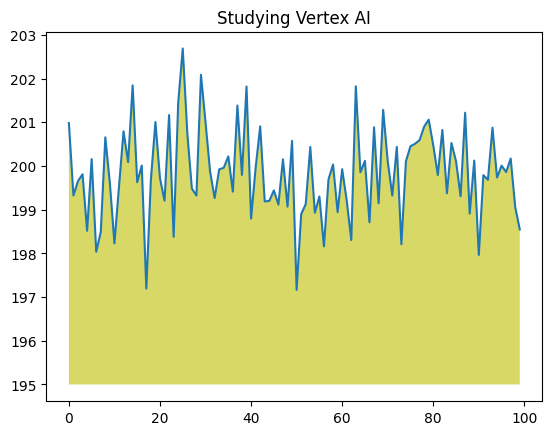

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.cloud import bigquery

# generate random data for the plot
ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

# create the main plot line
plt.plot(x, ys, '-')

# fill the area between the line and y=195 where ys > 195
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='y', alpha=0.6)

# add title
plt.title("Studying Vertex AI")

plt.show()

In [ ]:
# initialize the BigQuery client
client = bigquery.Client()

# select all columns from a public dataset with a limit of 1000 rows
query = """SELECT * FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017` LIMIT 1000"""

# execute the query
job = client.query(query)

# convert the query results to a pandas dataframe
df = job.to_dataframe()

In [ ]:
# execute the query and convert the results to a pandas dataframe
%%bigquery df
SELECT *
FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# show the first five rows
df.head()

,date,hour,lat,long,signal,network,operator,status,description,net,speed,satellites,precission,provider,activity,downloadSpeed,uploadSpeed,postal_code,town_name,position_geom
0,2015-02-04,18:23:44,41.52517,2.19203,9,null,null,2,STATE_EMERGENCY_ONLY,3G,8.4,0.0,53.0,fused,IN_VEHICLE,NaN,NaN,082606,Santa Perpètua de Mogoda,POINT(2.19203 41.52517)
1,2015-02-09,16:53:34,41.39987,2.13401,19,null,null,2,STATE_EMERGENCY_ONLY,3G,3.8,1.0,31.0,fused,STILL,NaN,NaN,080193,Barcelona,POINT(2.13401 41.39987)
2,2015-02-02,21:11:57,41.53094,2.12659,14,null,null,2,STATE_EMERGENCY_ONLY,3G,47.7,4.0,57.0,fused,IN_VEHICLE,NaN,NaN,082520,Barberà del Vallès,POINT(2.12659 41.53094)
3,2017-01-05,10:19:49,41.92654,2.27132,9,orange,MASMOVIL,2,STATE_EMERGENCY_ONLY,3G,58.1,11.0,10.0,gps,IN_VEHICLE,NaN,NaN,082981,Vic,POINT(2.27132 41.92654)
4,2017-01-07,13:14:33,41.57356,0.60638,4,orange,adamo,2,STATE_EMERGENCY_ONLY,3G,18.2,4.0,5.0,gps,UNKNOWN,NaN,NaN,250077,Albatàrrec,POINT(0.60638 41.57356)


In [ ]:
# get information on the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11744914 entries, 0 to 11744913
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           dbdate 
 1   hour           dbtime 
 2   lat            float64
 3   long           float64
 4   signal         Int64  
 5   network        object 
 6   operator       object 
 7   status         Int64  
 8   description    object 
 9   net            object 
 10  speed          float64
 11  satellites     float64
 12  precission     float64
 13  provider       object 
 14  activity       object 
 15  downloadSpeed  float64
 16  uploadSpeed    float64
 17  postal_code    object 
 18  town_name      object 
 19  position_geom  object 
dtypes: Int64(2), dbdate(1), dbtime(1), float64(7), object(9)
memory usage: 1.8+ GB


In [ ]:
# get statistics
df.describe()

,lat,long,signal,status,speed,satellites,precission,downloadSpeed,uploadSpeed
count,1.174491e+07,1.174491e+07,11744914.0,11744914.0,1.174491e+07,1.174369e+07,1.174369e+07,0.0,0.0
mean,4.120760e+01,7.851310e-01,13.262954,1.778794,2.643376e+01,9.795352e+05,4.636630e+07,NaN,NaN
std,3.481886e+00,9.397493e+00,7.467304,0.633283,3.553885e+01,3.356759e+09,9.644288e+10,NaN,NaN
min,-7.703775e+01,-1.787292e+02,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,4.138028e+01,1.690790e+00,8.0,2.0,1.400000e+00,2.000000e+00,1.000000e+01,NaN,NaN
50%,4.148911e+01,2.123840e+00,13.0,2.0,7.400000e+00,5.000000e+00,1.700000e+01,NaN,NaN
75%,4.169777e+01,2.245140e+00,18.0,2.0,4.080000e+01,7.000000e+00,3.000000e+01,NaN,NaN
max,6.343513e+01,1.396410e+02,99.0,3.0,2.550000e+02,1.150330e+13,2.415039e+14,NaN,NaN


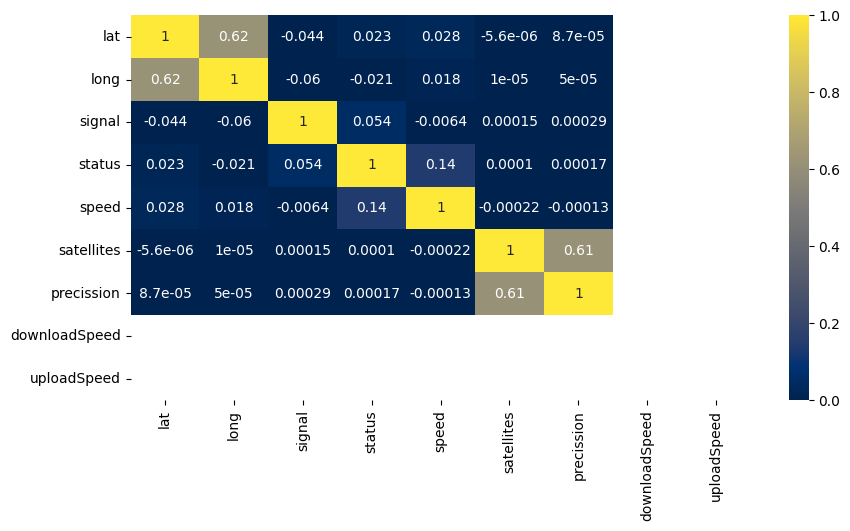

In [ ]:
# creat a new dataframe and select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# calculate correlation matrix
corr_matrix = numeric_df.corr()

# create visualization
plt.figure(figsize=(10, 5))

# generate heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, vmin=0, vmax=1, cmap='cividis')

plt.show()

In [ ]:
# pick up specific fields from the dataset
%%bigquery df2
SELECT signal, status
FROM `bigquery-public-data.catalonian_mobile_coverage_eu.mobile_data_2015_2017`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# get the first five rows of the new fields
df2.head()

,signal,status
0,99,0
1,32,2
2,51,2
3,58,2
4,49,2
